# Práctica 4

## Problema 1
Simula los siguientes experimentos aleatorios usando la función runif:

a) Extraemos una carta al azar de una baraja española y vemos si es un basto o no.

b) Repetimos n veces el experimento del apartado anterior y anotamos el número de bastos.

In [1]:
# Ver cuantos bastos salen en n intentos
bastos = 0
n = 1000
random = runif(n)
p = 1/4 # prob teórica de sacar un basto

for(i in 1:n){
  if(random[i] < p){
    bastos = bastos + 1
  }
  
}
bastos/n #Comparamos con la probabilidad p

[1] 0.246

## Problema 2
El número de kilómetros recorridos, X, hasta que se produce una caída en una
determinada carrera ciclista se puede modelizar con una distribución exponencial con función
densidad $f(x) = \lambda e^{-\lambda x}$. Siendo $\lambda = 0,01$ el número medio de caídas por kiómetro.

a) Simula 1000 distancias entre caídas.

b) Compara gráficamente los números aleatorios con la distribución teórica.

Hallamos la función de distribución y la invertimos:
$$
f(x) = \lambda e^{-\lambda x}
$$

$$
F(x) = \int_{-\infty}^x \lambda e^{-\lambda x} dx = 1-e^{-\lambda x}
$$

$$
x = F^{-1}(U) = \frac{-log(1-U)}{\lambda}
$$

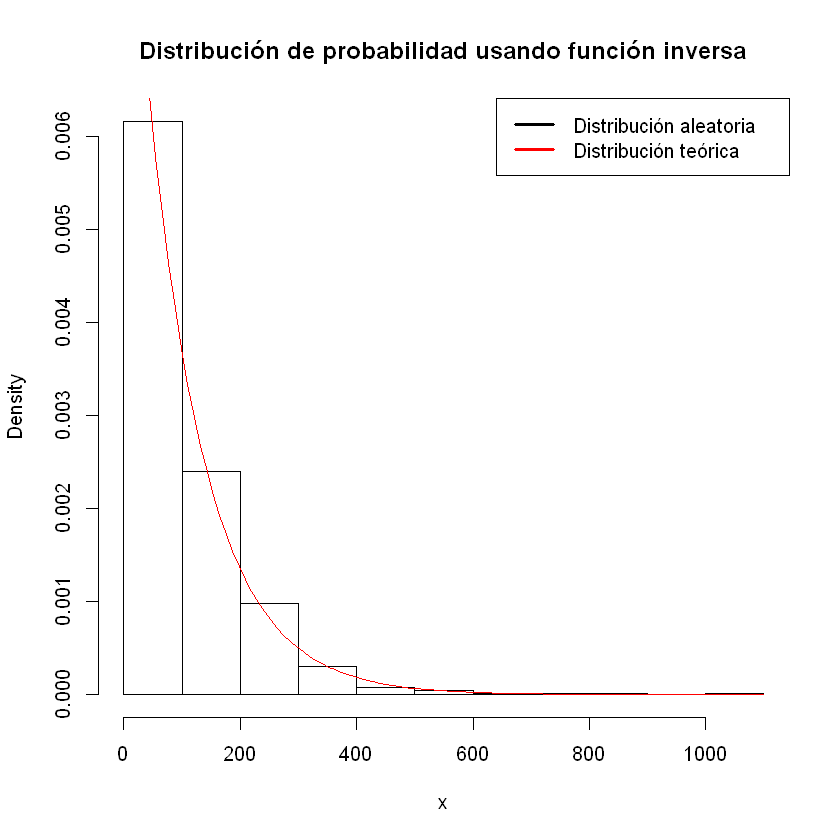

In [2]:
# f(x) = l*e^{-l*x}

# Simulamos utilizando el método de la función de distribución
# F(x) = 1-e^{-l*x}
# x = F^{-1}(U) = -log(1-U)/l

#Definimos lambda
l = 0.01

n = 1e3

#Simulamos la función de distribución inversa
x = -log(1-runif(n))/l

#Representamos
hist(x, freq = F, main = "Distribución de probabilidad usando función inversa")
curve(l*exp(-l*x), add = T, col = "red")
legend("topright", c("Distribución aleatoria", "Distribución teórica"),
       col=c("black", "red"), lwd=3)

## Problema 3:
El tamaño angular en grados, X, de unos determinados objetos en el cielo es una
variable aleatoria X con función densidad $f(x) = Kx^{-3}$ siendo $x > 1$ por razones físicas.

a) Halla el valor de la constante K > 0.

Para obtener la constante K simplemente integramos para normalizar la función:

$$
1 = \int_1^{\infty}Kx^{-3} = K \left[\frac{x^{-2}}{-2}\right]_1^{\infty} = \frac{K}{2} \Rightarrow K = 2
$$

b) Genera 1000 números aleatorios siguiendo la distribución de X.

c) Compara graficamente los números aleatorios con la distribución teórica.

Nuevamente, hallamos la función inversa:
$$
f(x) = Kx^{-3}
$$

$$
F(x) = \int_{-\infty}^x Kx^{-3} dx = \frac{K}{2}(1-\frac{1}{x^2})
$$

$$
x = F^{-1}(U) = \sqrt{\left(\frac{1}{(1-\frac{2U}{K})}\right)}
$$

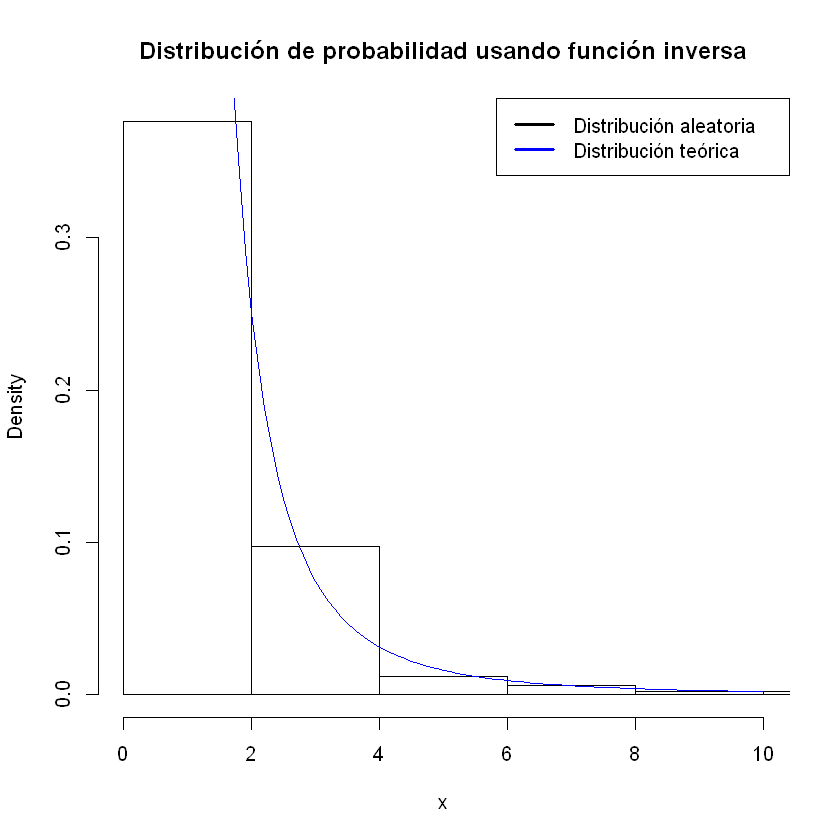

In [3]:
#a) Integrando f(x) entre 1 y inf e igualando a 1 sale que K=2

K = 2

# b) Como no está acotado el dominio (ni en x ni en y) no podemos usar el
# método del rechazo, y como no es gaussiana tampoco podemos usar
# box muller. Usamos el método de la función de distribución F(x)

# f(x) = Kx^{-3}
# F(x) = K/2(1-1/x^2)
# x = F^{-1}(U) = sqrt(1/(1-2U/K))

#Simulamos
n=1000
x = sqrt(1/(1-2*runif(n)/K))

hist(x, freq = F, 50, xlim = c(0,10),
     main = "Distribución de probabilidad usando función inversa")
curve(K*x^-3, add = T, col = "blue")
legend("topright", c("Distribución aleatoria", "Distribución teórica"),
       col=c("black", "blue"), lwd=3)